In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from typing import Tuple
from collections import namedtuple

In [2]:
AMARILLO_PATH = '/home/bal/Dropbox/Solar_Forecasting/texas_amarillo/amarillo_db.csv'
AMARILLO_DIFF_PATH = '/home/bal/Dropbox/Solar_Forecasting/texas_amarillo/amarillo_db_diff.csv'

In [3]:
Dataset = namedtuple('Dataset', ['train', 'test'])

def split_train_test(df: pd.DataFrame, num_levels: int = 10, sort_by_level: bool = True) -> Tuple[pd.DataFrame, pd.DataFrame]:
    # First, we need to make a copy
    train_set = df.copy()

    irr_sum = []
    indices = []

    # Each row contains 144 measurements (3 whole days in total)
    for index in range(0, len(train_set), 144):
        # We only want to compare the last day of the row (i.e. the outputs)
        output_day = train_set.iloc[index].values[-48:]
        indices.append(index)
        irr_sum.append(sum(output_day))

    irr_min = min(irr_sum)
    irr_max = max(irr_sum)
    bin_size = (irr_max - irr_min) / (num_levels - 1)

    # Convert sum to categories
    irr_categorical = [int(i // bin_size) for i in irr_sum]

    # Add randomly one day of each category
    combined = list(zip(irr_categorical, indices))
    count = 0
    test_levels = []
    test_indices = []
    while count < num_levels:
        samp = random.sample(combined, 1)[0]
        if samp[0] not in test_levels:
            test_levels.append(samp[0])
            test_indices.append(samp[1])
            count += 1
    
    # Sort from lower to higher level of irradiance
    if sort_by_level:
        test_levels, test_indices = zip(*sorted(zip(test_levels, test_indices)))
        test_levels = list(test_levels)
        test_indices = list(test_indices)

    # Make the test_set
    test_set = train_set.iloc[test_indices]
    test_set.reset_index(drop=True, inplace=True)

    # Drop every portion of the test set from the training set
    indices_to_drop = []
    for ind in test_indices:
        temp_index = list(range(ind, ind + 144))
        indices_to_drop.extend(temp_index)
    train_set.drop(indices_to_drop, inplace=True)
    train_set.reset_index(drop=True, inplace=True)

    return Dataset(train_set, test_set)


In [4]:
# 30-min resolution
ama_db = pd.read_csv(AMARILLO_PATH)
ama_db

,Unnamed: 0,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,y38,y39,y40,y41,y42,y43,y44,y45,y46,y47
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368012,368012,0,0,0,0,0,0,0,0,0,...,19,5,0,0,0,0,0,0,0,0
368013,368013,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
368014,368014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368015,368015,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# We don't need the first column (index)
ama_db.drop(columns=['Unnamed: 0'], inplace=True)
ama_db

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y38,y39,y40,y41,y42,y43,y44,y45,y46,y47
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368012,0,0,0,0,0,0,0,0,0,0,...,19,5,0,0,0,0,0,0,0,0
368013,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
368014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Split into train and test
dataset = split_train_test(ama_db, num_levels=10, sort_by_level=True)
train = dataset.train
test = dataset.test

In [8]:
train

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y38,y39,y40,y41,y42,y43,y44,y45,y46,y47
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366572,0,0,0,0,0,0,0,0,0,0,...,19,5,0,0,0,0,0,0,0,0
366573,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,0,0,0
366574,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,y38,y39,y40,y41,y42,y43,y44,y45,y46,y47
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,69,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,75,12,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,126,47,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,134,46,0,0,0,0,0,0,0,0


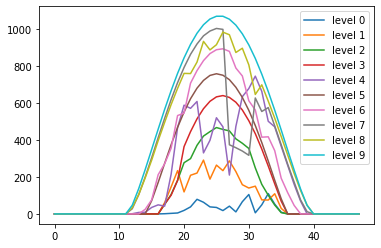

In [10]:
# Plot all days in test set
for i in range(len(test)):
    plt.plot(test.iloc[i].values[-48:], label=f'level {i}')
plt.legend()